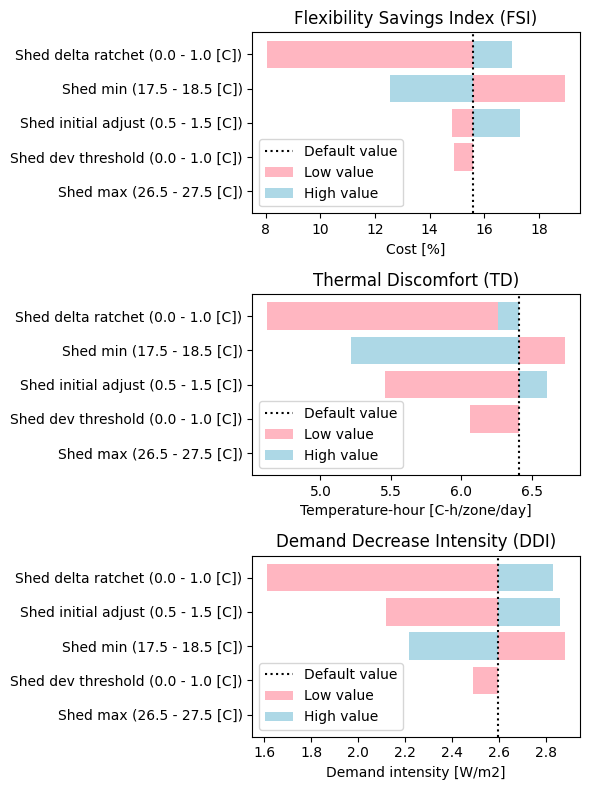

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

building = 'multizone_office_simple_air'

# Read cost CSV file
df_cost = pd.read_csv("cost.csv")

# Calculate the difference between min and max price and the baseline
df_cost["min_diff"] = df_cost["min"] - df_cost["fixed"]
df_cost["max_diff"] = df_cost["max"] - df_cost["fixed"]
df_cost["diff"] = abs(df_cost["max"] - df_cost["min"])

df_cost_sorted = df_cost.sort_values(by="diff", ascending=True)

# Read comfort CSV file
df_comfort = pd.read_csv("comfort.csv")

# Calculate the difference between min and max temperature and the fixed
df_comfort["min_diff"] = df_comfort["min"] - df_comfort["fixed"]
df_comfort["max_diff"] = df_comfort["max"] - df_comfort["fixed"]
df_comfort["diff"] = abs(df_comfort["max"] - df_comfort["min"])

df_comfort_sorted = df_comfort.sort_values(by="diff", ascending=True)

# Read comfort CSV file
df_demand = pd.read_csv("demand_new.csv")

# Calculate the difference between min and max temperature and the fixed
df_demand["min_diff"] = df_demand["min"] - df_demand["fixed"]
df_demand["max_diff"] = df_demand["max"] - df_demand["fixed"]
df_demand["diff"] = abs(df_demand["max"] - df_demand["min"])

df_demand_sorted = df_demand.sort_values(by="diff", ascending=True)

# Create a figure with two subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Plot horizontal bar chart for cost savings
axs[0].barh(df_cost_sorted["variable"], df_cost_sorted["min_diff"], left=df_cost["fixed"], color=["lightpink" for _ in df_cost["min_diff"]])
axs[0].barh(df_cost_sorted["variable"], df_cost_sorted["max_diff"], left=df_cost["fixed"], color=["lightblue" for _ in df_cost["max_diff"]])
axs[0].set_xlabel("Cost [%]")
axs[0].set_title("Flexibility Savings Index (FSI)")
axs[0].axvline(df_cost_sorted["fixed"].mean(), linestyle=":", color="black")
axs[0].legend(["Default value", "Low value", "High value"], loc="lower left")

# Plot horizontal bar chart for thermal discomfort
axs[1].barh(df_comfort_sorted["variable"], df_comfort_sorted["min_diff"], left=df_comfort["fixed"], color=["lightpink" for _ in df_comfort["min_diff"]])
axs[1].barh(df_comfort_sorted["variable"], df_comfort_sorted["max_diff"], left=df_comfort["fixed"], color=["lightblue" for _ in df_comfort["max_diff"]])
axs[1].set_xlabel("Temperature-hour [C-h/zone/day]")
axs[1].set_title("Thermal Discomfort (TD)")
axs[1].axvline(df_comfort_sorted["fixed"].mean(), linestyle=":", color="black")
axs[1].legend(["Default value", "Low value", "High value"], loc="lower left")

axs[2].barh(df_demand_sorted["variable"], df_demand_sorted["min_diff"], left=df_demand["fixed"], color=["lightpink" for _ in df_demand["min_diff"]])
axs[2].barh(df_demand_sorted["variable"], df_demand_sorted["max_diff"], left=df_demand["fixed"], color=["lightblue" for _ in df_demand["max_diff"]])
axs[2].set_xlabel("Demand intensity [W/m2]")
axs[2].set_title("Demand Decrease Intensity (DDI)")
axs[2].axvline(df_demand_sorted["fixed"].mean(), linestyle=":", color="black")
axs[2].legend(["Default value", "Low value", "High value"], loc="lower left")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig(f'{building}_sensitivity.png', transparent=True)

# Show the plot
plt.show()


Shed max does not have impact in the heating mode scenario

Shed min leads to opposite impact direction, that is a smaller value, means a larger allowed offset, which in turn leads to higher DDI, FSI and TD

Shed delta ratchet has the biggest impact because at 0 means not racthet, that is not furhter shed apart from the initial shed. This leads to smaller TD, smaller DDI and FSI. A higher delta can lead to higher DDI and FSI and slightly smaller TD which could be attribute to the faster return to the baseline setpoing with higher delta during rebound management

Shed initial adjust has higher impact on the DDI than in the others. Smaller values lead to smaller DDI and TD and slightly smaller FSI. The opposite is true too.

Shed dev threshold has a small impact when decreased leading to smaller DDI, FSI and TD. But has no impact when increased. 



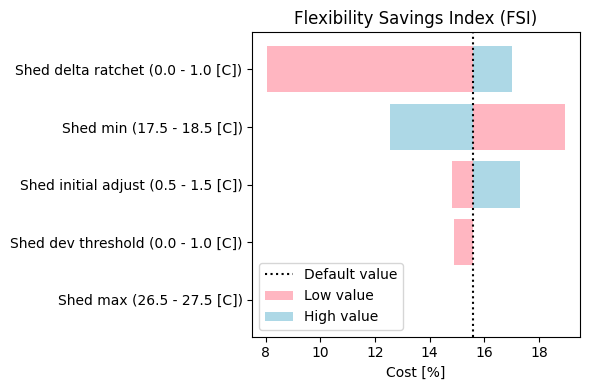

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

building = 'multizone_office_simple_air'

# Read cost CSV file
df_cost = pd.read_csv("cost.csv")

# Calculate the difference between min and max price and the baseline
df_cost["min_diff"] = df_cost["min"] - df_cost["fixed"]
df_cost["max_diff"] = df_cost["max"] - df_cost["fixed"]
df_cost["diff"] = abs(df_cost["max"] - df_cost["min"])

df_cost_sorted = df_cost.sort_values(by="diff", ascending=True)

# Plot horizontal bar chart for cost savings
plt.figure(figsize=(6, 4))
plt.barh(df_cost_sorted["variable"], df_cost_sorted["min_diff"], left=df_cost["fixed"], color=["lightpink" for _ in df_cost["min_diff"]])
plt.barh(df_cost_sorted["variable"], df_cost_sorted["max_diff"], left=df_cost["fixed"], color=["lightblue" for _ in df_cost["max_diff"]])
plt.xlabel("Cost [%]")
plt.title("Flexibility Savings Index (FSI)")
plt.axvline(df_cost_sorted["fixed"].mean(), linestyle=":", color="black")
plt.legend(["Default value", "Low value", "High value"], loc="lower left")
plt.tight_layout()
plt.savefig(f'{building}_sensitivity_FSI.png', transparent=True)
plt.show()


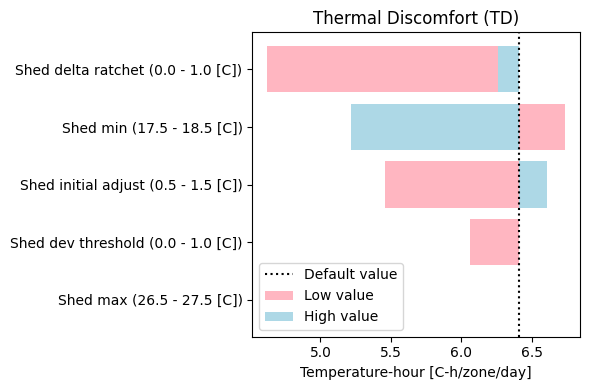

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

building = 'multizone_office_simple_air'

# Read comfort CSV file
df_comfort = pd.read_csv("comfort.csv")

# Calculate the difference between min and max temperature and the fixed
df_comfort["min_diff"] = df_comfort["min"] - df_comfort["fixed"]
df_comfort["max_diff"] = df_comfort["max"] - df_comfort["fixed"]
df_comfort["diff"] = abs(df_comfort["max"] - df_comfort["min"])

df_comfort_sorted = df_comfort.sort_values(by= "diff", ascending=True)

# Plot horizontal bar chart for thermal discomfort
plt.figure(figsize=(6, 4))
plt.barh(df_comfort_sorted["variable"], df_comfort_sorted["min_diff"], left=df_comfort["fixed"], color=["lightpink" for _ in df_comfort["min_diff"]])
plt.barh(df_comfort_sorted["variable"], df_comfort_sorted["max_diff"], left=df_comfort["fixed"], color=["lightblue" for _ in df_comfort["max_diff"]])
plt.xlabel("Temperature-hour [C-h/zone/day]")
plt.title("Thermal Discomfort (TD)")
plt.axvline(df_comfort_sorted["fixed"].mean(), linestyle=":", color="black")
plt.legend(["Default value", "Low value", "High value"], loc="lower left")
plt.tight_layout()
plt.savefig(f'{building}_sensitivity_TD.png', transparent=True)
plt.show()


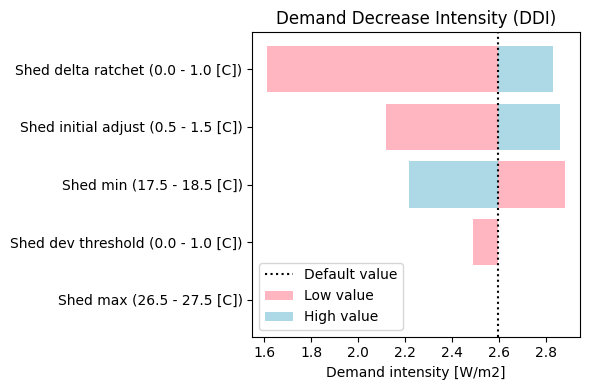

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

building = 'multizone_office_simple_air'

# Read demand CSV file
df_demand = pd.read_csv("demand_new.csv")

# Calculate the difference between min and max demand and the fixed
df_demand["min_diff"] = df_demand["min"] - df_demand["fixed"]
df_demand["max_diff"] = df_demand["max"] - df_demand["fixed"]
df_demand["diff"] = abs(df_demand["max"] - df_demand["min"])

df_demand_sorted = df_demand.sort_values(by="diff", ascending=True)

# Plot horizontal bar chart for demand intensity
plt.figure(figsize=(6, 4))
plt.barh(df_demand_sorted["variable"], df_demand_sorted["min_diff"], left=df_demand["fixed"], color=["lightpink" for _ in df_demand["min_diff"]])
plt.barh(df_demand_sorted["variable"], df_demand_sorted["max_diff"], left=df_demand["fixed"], color=["lightblue" for _ in df_demand["max_diff"]])
plt.xlabel("Demand intensity [W/m2]")
plt.title("Demand Decrease Intensity (DDI)")
plt.axvline(df_demand_sorted["fixed"].mean(), linestyle=":", color="black")
plt.legend(["Default value", "Low value", "High value"], loc="lower left")
plt.tight_layout()
plt.savefig(f'{building}_sensitivity_DDI.png', transparent=True)
plt.show()


- Variable Sensitivity: The diagram shows how sensitive the output (e.g., cost savings and thermal comfortmetric) is to changes in different user-defined variables. The length of the bars represents the magnitude of the impact.
- Most Significant Influence: With the bars sorted in descending order of impact, the variables with the largest impact are placed at the top of the diagram. 
- Direction of Impact: The bars are color-coded to indicate the direction of the impact. This helps understand what kind of change an increase or decrease in a variable leads to in the output.

Visual representation makes it easier for non-experts decision-makers understand the relative importance of different variables and their potential impact on outcomes.

Analysis
- changing in the shed delta and initial adjust are the variables that have the most significant influece both in cost and comfort
- reduce delta to zero, which means that control wont incrementally shed after initial change of 1C (limiting shed to 1C), means that thermal discomfort can reduce 2C-h/zone.day but that at the same time 10%.. so if cost is important, the fixed scenario must be kept or event increased to 1C which wont change much the discomfort
- decrease shed initial adjust will decrease cost savings relatively proportinal as it will decrease discomfort. the opposite is not true, increase shed initial adjust will increase discomfort more than it will increase savings


- increase shed dev threshold has no influence as it wont change cost or discomfort, while reducing it will decrease cost more significantly that decrease discomfort

- increase shed max offset can increase very slightly the cost savings and wont change discomfrot, but decrease it can reduce cost savings slightly more significantly than the discomfort

- shift time horizon has counter-intuitive direction of impact in both, showing that when we increase it we have less savings and a slightly less discomfort. If we decrease it, it increase savings and discomfort. 

- since shift dev threshold has opposite direction of impact while increasing it, reducing cost savings and increasing discomfort, it wont be good for any KPI. If we reduce it it will reduce discomfort, but will also reduce cost savings.       

- any change in shift initial adjust will reduce savings. But if the goal is to have less discomfort, then increasing it can reduce discomfort.